In [1]:
from pioneerml.zenml import utils as zenml_utils

PROJECT_ROOT = zenml_utils.find_project_root()
zenml_client = zenml_utils.setup_zenml_for_notebook(root_path=PROJECT_ROOT, use_in_memory=True)
print(f"ZenML ready with stack: {zenml_client.active_stack_model.name}")


Using ZenML repository root: /home/jack/python_projects/pioneerML
Ensure this is the top-level of your repo (.zen must live here).
ZenML ready with stack: default


In [2]:
from pioneerml.zenml import load_step_output
from pioneerml.zenml.pipelines.training import group_splitter_optuna_pipeline
from pioneerml.optuna import OptunaStudyManager
from pioneerml.data import NODE_LABEL_TO_NAME, NUM_NODE_CLASSES

# Set up Optuna storage
optuna_manager = OptunaStudyManager(
    project_root=PROJECT_ROOT,
    study_name="group_splitter_01_01_2026",
)
optuna_storage = optuna_manager.resolve_storage()
print(f"Using Optuna storage: {optuna_storage}")

Using Optuna storage: sqlite:////home/jack/python_projects/pioneerML/.optuna/group_splitter_01_01_2026.db


In [3]:
from pathlib import Path

# Configure the pipeline
hits_pattern = str(Path(PROJECT_ROOT) / "data" / "hits_batch_*.npy")
info_pattern = str(Path(PROJECT_ROOT) / "data" / "group_info_batch_*.npy")

run = group_splitter_optuna_pipeline.with_options(enable_cache=False)(
    build_datamodule_params={
        "hits_pattern": hits_pattern,
        "info_pattern": info_pattern,
        "max_files": 1,
        "limit_groups": 1000,
        "min_hits": 3,
        "use_group_probs": False,
        "batch_size": 8,
        "num_workers": None,
        "val_split": 0.15,
        "seed": 42,
    },
    run_hparam_search_params={
        'n_trials': 1,
        'max_epochs': 1,
        'limit_train_batches': 0.4,
        'limit_val_batches': 1.0,
        'storage': optuna_storage,
        'study_name': 'group_splitter_01_01_2026',
    },
    train_best_model_params={
        'max_epochs': 5,
        'early_stopping': True,
        'early_stopping_patience': 6,
        'early_stopping_monitor': 'val_loss',
        'early_stopping_mode': 'min',
    },
)
print(f"Run name: {run.name}")
print(f"Run status: {run.status}")


Initiating a new run for the pipeline: group_splitter_optuna_pipeline.
Caching is disabled by default for group_splitter_optuna_pipeline.
Using user: default
Using stack: default
  artifact_store: default
  deployer: default
  orchestrator: default
You can visualize your pipeline runs in the ZenML Dashboard. In order to try it locally, please run zenml login --local.
Step build_splitter_datamodule has started.


[build_splitter_datamodule] Auto-detected num_workers: 11 (from 12 CPU cores, using cores-1)
[build_splitter_datamodule] Starting to load data from: hits=/home/jack/python_projects/pioneerML/data/hits_batch_*.npy, info=/home/jack/python_projects/pioneerML/data/group_info_batch_*.npy
[build_splitter_datamodule] Limiting to 1 files (from 11 total files found, max_files=1)
[build_splitter_datamodule] Limiting to 1 files (from 11 total files found, max_files=1)
[build_splitter_datamodule] Loaded 1000 groups from 1 file pairs
[build_splitter_datamodule] Loaded 1000 groups. Building datamodule...
[build_splitter_datamodule] Calling setup(stage='fit')...
[build_splitter_datamodule] Setup complete. Train: 850, Val: 150


Step build_splitter_datamodule has finished in 1.414s.
Step run_splitter_hparam_search has started.


[run_splitter_hparam_search] Using GPU: NVIDIA GeForce RTX 5070
[run_splitter_hparam_search] CUDA devices: 1
[run_splitter_hparam_search] Enabled Tensor Core optimization (medium precision)
[run_splitter_hparam_search] Dataset sizes - Train: 850, Val: 150
[run_splitter_hparam_search] Starting Optuna search with 1 trials, 1 epochs per trial...
[I 2026-01-02 06:26:28,255] Using an existing study with name 'group_splitter_01_01_2026' instead of creating a new one.
[run_splitter_hparam_search] Starting Optuna study (storage=sqlite:////home/jack/python_projects/pioneerML/.optuna/group_splitter_01_01_2026.db, name=group_splitter_01_01_2026)...


  0%|          | 0/1 [00:00<?, ?it/s]

[run_splitter_hparam_search] Trial 1/1 (cumulative 3/3) starting...
[run_splitter_hparam_search] Trial 1 params: batch_size=8, hidden=192 (from 192), heads=6, layers=3, dropout=0.2497, lr=0.000155, weight_decay=0.000296
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
`Trainer(limit_val_batches=1.0)` was configured so 100% of the batches will be used..
[run_splitter_hparam_search] Trial 1 training 1 epochs...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name    ┃ Type              ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ model   │ GroupSplitter     │  1.4 M │ train │     0 │
│ 1 │ loss_fn │ BCEWithLogitsLoss │      0 │ train │     0 │
└───┴─────────┴───────────────────┴────────┴───────┴───────┘

Trainable params: 1.4 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.4 M                                                                                                
Total estimated model params size (MB): 5                                                                          
Modules in train mode: 59                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.


[run_splitter_hparam_search] Trial 1 validating...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

[run_splitter_hparam_search] Trial 1 completed with score: 0.789073
[run_splitter_hparam_search] Optuna search complete! Best score: 0.881213
[run_splitter_hparam_search] Best params: {'batch_size': 8, 'heads': 9, 'hidden': 150, 'layers': 2, 'dropout': 0.19683318923607906, 'lr': 0.009036093090271233, 'weight_decay': 0.0005302276775851267}


[I 2026-01-02 06:26:34,407] Trial 2 finished with value: 0.7890731692314148 and parameters: {'batch_size': 8, 'heads': 6, 'hidden': 192, 'layers': 3, 'dropout': 0.24974766974577384, 'lr': 0.00015548224090514617, 'weight_decay': 0.00029571682437787934}. Best is trial 1 with value: 0.881213366985321.
Step run_splitter_hparam_search has finished in 6.748s.
Step train_best_splitter has started.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores


┏━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name    ┃ Type              ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ model   │ GroupSplitter     │  516 K │ train │     0 │
│ 1 │ loss_fn │ BCEWithLogitsLoss │      0 │ train │     0 │
└───┴─────────┴───────────────────┴────────┴───────┴───────┘

Trainable params: 516 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 516 K                                                                                                
Total estimated model params size (MB): 2                                                                          
Modules in train mode: 43                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Step train_best_splitter has finished in 21.814s.
Step collect_splitter_predictions has started.
Step collect_splitter_predictions has finished in 2.243s.
Pipeline run has finished in 34.781s.
Run name: group_splitter_optuna_pipeline-2026_01_02-11_26_25_532626
Run status: completed


In [4]:
# Load artifacts from the pipeline run
trained_module = load_step_output(run, "train_best_splitter")
datamodule = load_step_output(run, "build_splitter_datamodule")
predictions = load_step_output(run, "collect_splitter_predictions", index=0)
targets = load_step_output(run, "collect_splitter_predictions", index=1)
best_params = load_step_output(run, "run_splitter_hparam_search")

if trained_module is None or datamodule is None:
    raise RuntimeError("Could not load artifacts from the optuna pipeline run.")

datamodule.setup(stage="fit")
trained_module.eval()
device = next(trained_module.parameters()).device
val_size = len(datamodule.val_dataset) if datamodule.val_dataset is not None else len(datamodule.train_dataset)
print(f"Loaded module on {device}; validation samples: {val_size}")
print("Best params from Optuna:", best_params)
print("Epochs actually run:", getattr(trained_module, "final_epochs_run", None))


Loaded module on cpu; validation samples: 150
Best params from Optuna: {'batch_size': 8, 'heads': 9, 'hidden': 150, 'layers': 2, 'dropout': 0.19683318923607906, 'lr': 0.009036093090271233, 'weight_decay': 0.0005302276775851267, 'best_score': 0.881213366985321, 'n_trials': 3} {'batch_size': 8, 'heads': 9, 'hidden': 150, 'layers': 2, 'dropout': 0.19683318923607906, 'lr': 0.009036093090271233, 'weight_decay': 0.0005302276775851267, 'best_score': 0.881213366985321, 'n_trials': 3}
Epochs actually run: 6 6


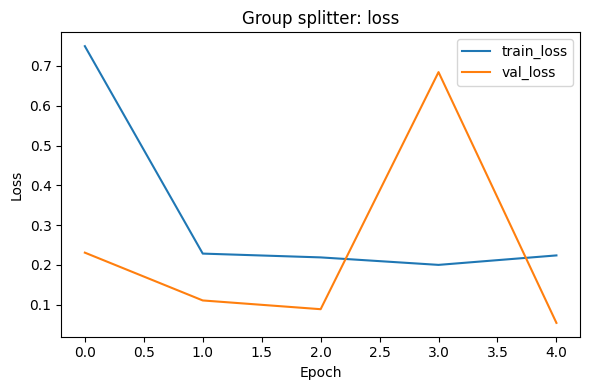

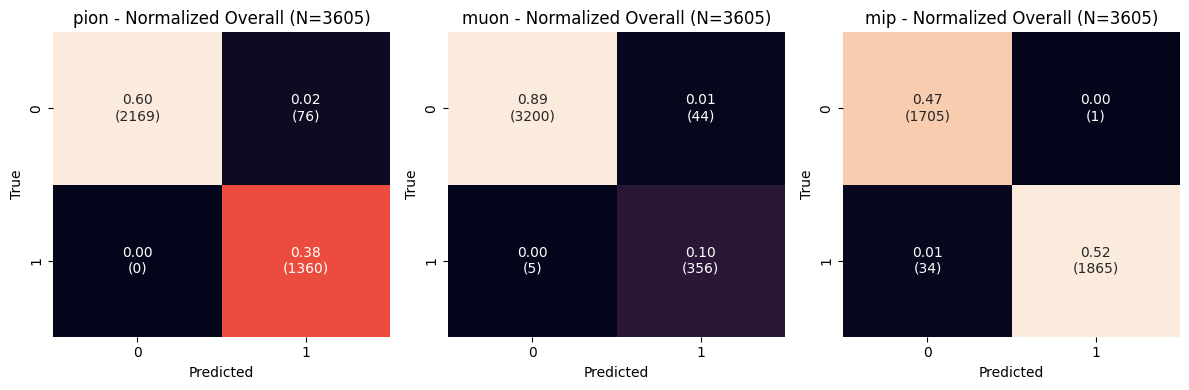

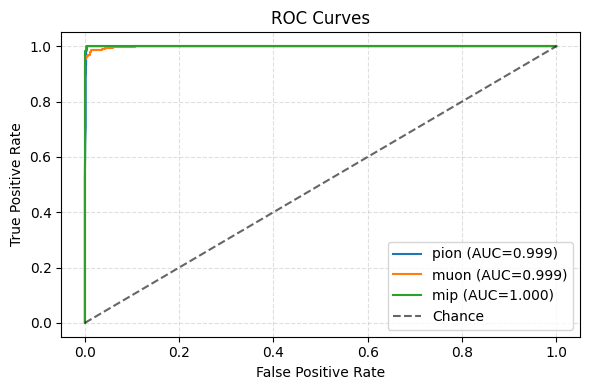

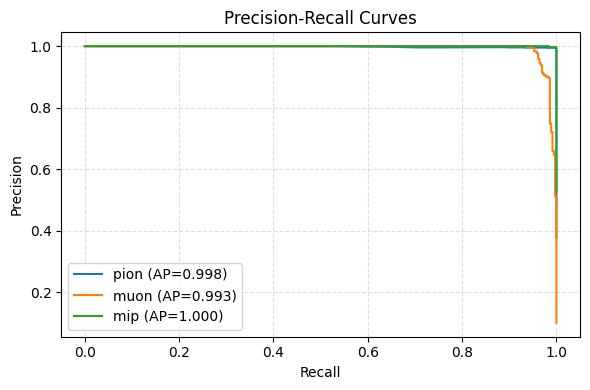

In [5]:
from pioneerml.evaluation.plots import (
    plot_loss_curves,
    plot_multilabel_confusion_matrix,
    plot_precision_recall_curves,
    plot_roc_curves,
)

class_names = list(NODE_LABEL_TO_NAME.values())

# Loss curves
plot_loss_curves(trained_module, title="Group splitter: loss", show=True)

# Classification diagnostics
plot_multilabel_confusion_matrix(
    predictions=predictions,
    targets=targets,
    class_names=class_names,
    threshold=0.5,
    normalize=True,
    show=True,
)
plot_roc_curves(predictions, targets, class_names=class_names, show=True)
plot_precision_recall_curves(predictions, targets, class_names=class_names, show=True)


In [6]:
from pioneerml.metadata import TrainingMetadata, save_model_and_metadata, timestamp_now

# Build metadata and save model + metadata together
save_ts = timestamp_now()

class_names = list(NODE_LABEL_TO_NAME.values())

meta = TrainingMetadata(
    model_type="GroupSplitter",
    timestamp=save_ts,
    run_name=run.name if 'run' in locals() else None,
    best_hyperparameters=best_params,
    best_score=best_params.get('best_score') if isinstance(best_params, dict) else None,
    n_trials=best_params.get('n_trials') if isinstance(best_params, dict) else None,
    training_config=getattr(trained_module, 'training_config', {}),
    epochs_run=getattr(trained_module, 'final_epochs_run', None),
    dataset_info={
        'train_size': len(datamodule.train_dataset) if datamodule.train_dataset else 0,
        'val_size': len(datamodule.val_dataset) if datamodule.val_dataset else 0,
        'num_classes': NUM_NODE_CLASSES,
        'class_names': class_names,
    },
    model_architecture={
        'num_classes': NUM_NODE_CLASSES,
        'hidden': best_params.get('hidden') if isinstance(best_params, dict) else None,
        'heads': best_params.get('heads') if isinstance(best_params, dict) else None,
        'layers': best_params.get('layers') if isinstance(best_params, dict) else None,
        'dropout': best_params.get('dropout') if isinstance(best_params, dict) else None,
    },
    # Store link to Optuna DB instead of full history
    optuna_storage=optuna_storage,
    optuna_study_name=optuna_manager.study_name,
)

paths = save_model_and_metadata(
    model=trained_module.model,
    metadata=meta,
    state_dict_only=True,
)

print("Saved artifacts:")
for k, v in paths.items():
    print(f"  {k}: {v}")


Saved artifacts:
  dir: /home/jack/python_projects/pioneerML/trained_models/groupsplitter
  state_dict: /home/jack/python_projects/pioneerML/trained_models/groupsplitter/groupsplitter_20260102_112701_group_splitter_optuna_pipeline-2026_01_02-11_26_25_532626_state_dict.pt
  metadata: /home/jack/python_projects/pioneerML/trained_models/groupsplitter/groupsplitter_20260102_112701_group_splitter_optuna_pipeline-2026_01_02-11_26_25_532626_metadata.json
  full_checkpoint: /home/jack/python_projects/pioneerML/trained_models/groupsplitter/groupsplitter_20260102_112701_group_splitter_optuna_pipeline-2026_01_02-11_26_25_532626_checkpoint.pt
